In [1]:
from netCDF4 import Dataset
from matplotlib import gridspec

# use modules
import sys as sys
sys.path.append('../python_modules/')

import numpy as np
import calendar as calendar
from gridbox_areas import gbox_areas
from plot_1D import *
import time
######################### Input ####################################
loc='/gws/nopw/j04/ukca_vol2/dcw32/'
jobids1=['xnofa','xnofb','xnofc','xnofd','xnofe','xnoff']
jobids2=['xnofg','xnofh','xnofi','xnofj','xnofk','xnofl']
jobids3=['xnofn','xnofo','xnofp','xnofq','xnofr','xnofs','xnoft','xnofu','xnofv','xnofw','xnofx','xnofy']
#jobids=['xnofg','xnofh','xnofi','xnofj','xnofk','xnofl']
jobid_base='xnfiy'
var='salinity'
varn='samalas_ozone_cold_perc'
print (var)
# Plotting Arguments
#levs=[50,100,150,200,250,300,350,400,450,500]
#colmap='Spectral'
#cbar_label='Ozone Column / DU'
# Shift the colormap to a defined centre, for example when doing
# a change plot where there's a bias (e.g. changes between -0.1 to 0.3)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import AxesGrid
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False),
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap
levs=[-80,-60,-40,-20,-10,-5,5,10]
fakelevs=[-80,-60,-40,-20,-10,-5,5,10,20,40,60,80]
colmap='RdBu_r'
cmap=plt.cm.get_cmap(colmap)
levs2=np.insert(fakelevs,0,fakelevs[0]-1)
levs2=np.append(levs2,levs2[len(levs2)-1]+1)
norm=mpl.colors.BoundaryNorm(levs2, ncolors=cmap.N, clip=True)
outdir=''
outname=varn+'_surftimese_plot_fix'+time.strftime("%Y%m%d")
save=True
format='pdf'
extend='both'
mm1=240
mm2=120
mm3=120

salinity


In [2]:
#mm=240
####################################################################
#
# Extract climatology
file=Dataset(loc+jobid_base+'/netcdf/'+jobid_base+'_oz.nc')
lats=file.variables['latitude'][:]
time=file.variables['t'][:]
wstar=file.variables[var][:,0,:,:].squeeze()
file.close()
wstar=np.mean(wstar,axis=2)
clima=np.zeros([12,len(lats)])
climb=np.zeros([12,len(lats)])
for mon in range(12):
        clima[mon,:]=np.mean(wstar[mon::12,:],axis=0)
        climb[mon,:]=1.96*np.std(wstar[mon::12,:],axis=0)
clima=clima
climb=climb
clima=np.roll(clima,7,axis=0)
climb=np.roll(climb,7,axis=0)
#

SAVING samalas_ozone_cold_perc_surftimese_plot_fix20200623.pdf


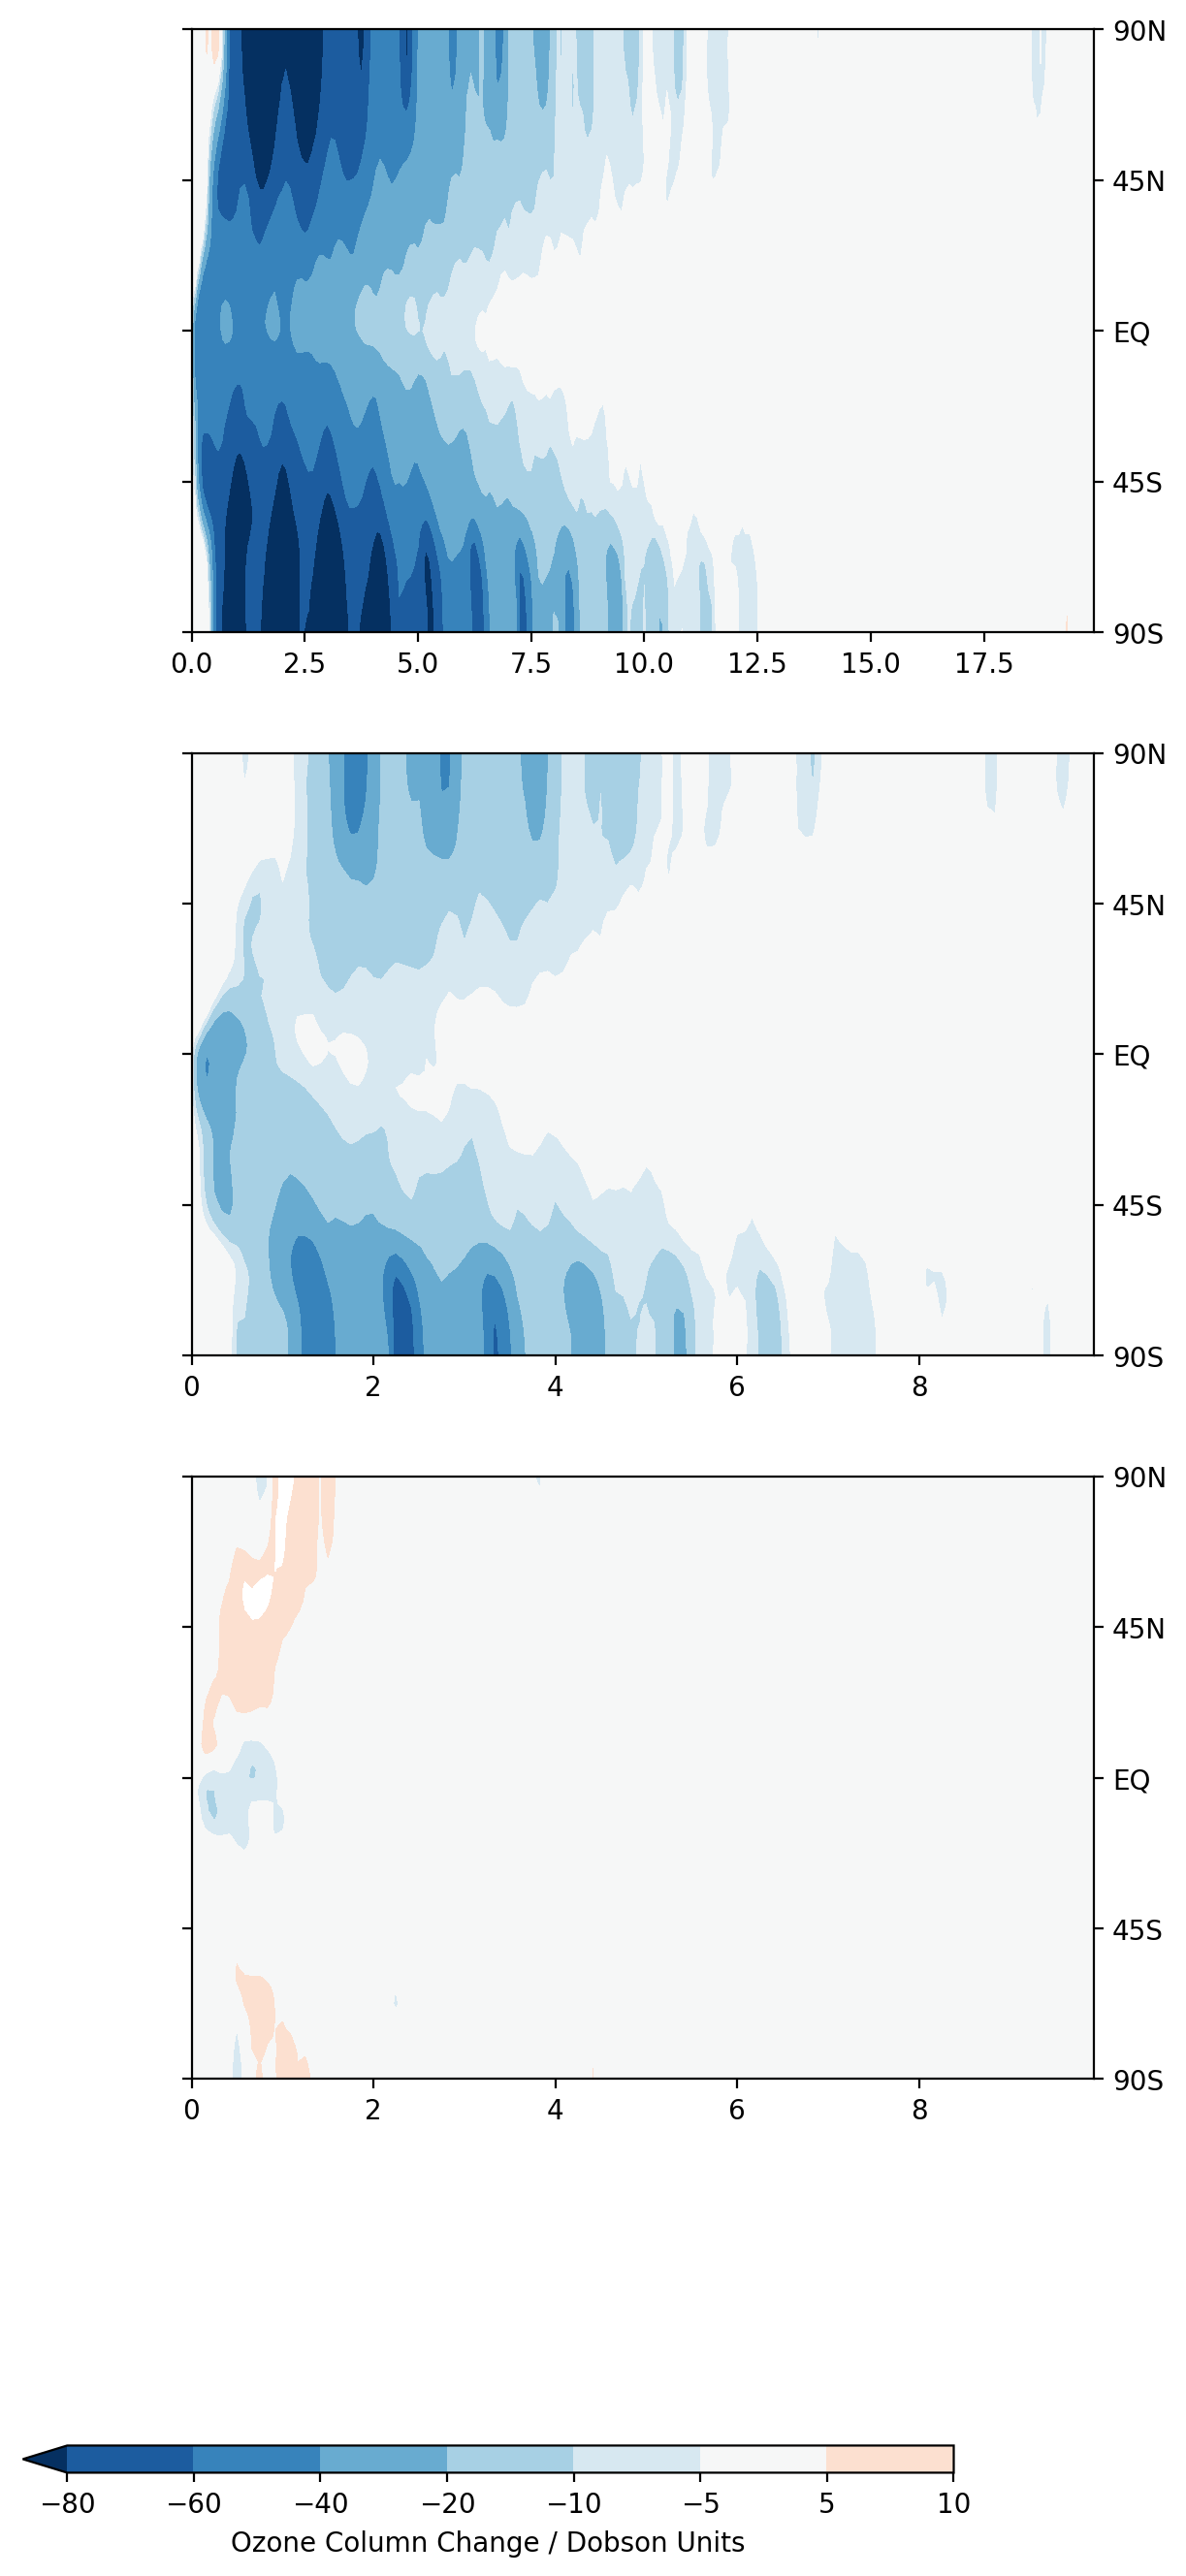

In [9]:
#Set up figure
fig=plt.figure(figsize=(6,14), dpi=200)
gs1 = gridspec.GridSpec(3, 1)
gs1.update(wspace=0.0)
ax1 = plt.subplot(gs1[0,:])
ax2 = plt.subplot(gs1[1,0])
ax3 = plt.subplot(gs1[2,0])
def extract_col(axis,jobids,mm,l_right):
    njob=len(jobids)
    store1=np.zeros([njob,mm,73])
    clima_now=np.tile(clima,(int(mm/12),1))
    climb_now=np.tile(climb,(int(mm/12),1))
    for i in range(njob):
        file=Dataset(loc+jobids[i]+'/netcdf/'+jobids[i]+'_oz.nc')
        lats=file.variables['latitude'][:]
        lons=file.variables['longitude'][:]
        time=file.variables['t'][:]
        field=file.variables[var][:].squeeze()
        file.close()
        field=field[:,0,:,:]
        #TimexLat

        field=np.mean(field,axis=2)
        store1[i,:,:]=100*(field-clima_now)/clima_now
    time=time/360.
    time=time-time[0]
    store=np.mean(store1,axis=0)
    stdevmap=np.abs(store)>climb_now
    # Start Plotting
    cf1=axis.contourf(time,lats,np.transpose(store),levs,cmap=cmap,norm=norm,extend='min')
    #cf2=axis.contourf(time,lats,np.transpose(stdevmap),hatches=['xxx',None],cmap=plt.get_cmap('RdBu'),alpha=0.0,extend='both',rasterized=True)
    axis.contour(time,lats,np.transpose(store),[220],colors='k',linewidths=4)
    axis.set_yticks([-90,-45,0,45,90])
    axis.set_yticklabels(['90S','45S','EQ','45N','90N'])
    if l_right==True:
                axis.yaxis.tick_right()
                axis.yaxis.set_ticks_position('both')
    return cf1
cf1=extract_col(ax1,jobids1,mm1,True)
# ax1.text(0.02,1.02,'A: HI-HAL',transform=ax1.transAxes\
#         ,verticalalignment='bottom',horizontalalignment='left'\
#         ,fontsize='14',color='k')
cf2=extract_col(ax2,jobids2,mm2,True)
# ax2.text(0.04,1.02,'B: LO-HAL',transform=ax2.transAxes\
#         ,verticalalignment='bottom',horizontalalignment='left'\
#         ,fontsize='14',color='k')
cf3=extract_col(ax3,jobids3,mm3,True)
# ax3.text(0.04,1.02,'C: BOTH-SO2',transform=ax3.transAxes\
#         ,verticalalignment='bottom',horizontalalignment='left'\
#         ,fontsize='14',color='k')
cbaxes=fig.add_axes([-0.02, -0.02, 0.8, 0.01])
cbar=plt.colorbar(cf3,cax=cbaxes,orientation="horizontal")
cbar.set_label('Ozone Column Change / Dobson Units')
cbaxes.yaxis.set_label_position('left')
# ax3.text(0.00,-0.12,'Years After Eruption',transform=ax3.transAxes\
#         ,verticalalignment='top',horizontalalignment='center'\
#         ,fontsize='12',color='k')
if save==True:
                print ("SAVING "+outdir+outname+'.'+format)
#                 if not os.path.exists(outdir):
#                         os.makedirs(outdir)
                plt.savefig(outdir+outname+'.'+format,bbox_inches="tight")

plt.savefig(outname+'.svg')#+format,bbox_inches="tight")

#plt.show()